In [49]:
from math import comb as C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from tqdm import tqdm
from loguru import logger

## 习题1.5.1

假设每个人都等可能地出生在一年中的任何一个月里. 如果两个人的出生月份是相互独立的, 那么他们出生在同一个月的概率是多少?

他们的出生月份最多相差一个月的概率是多少?

对于任意的$k\in\{0,1,2,...,12\}$,求他们的出生月份最多相差k个月的概率. 你对两个人的出生月份最多相差一个月的可能性感到惊讶吗?

##### Answer

In [11]:
# 第一问
numerator = C(12, 1) * 1
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=12, denominator=144, ans=0.083


In [12]:
# 第二问
numerator = C(12, 1) * C(3, 1)
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=36, denominator=144, ans=0.250


In [19]:
# 第三问
def prob(k=0):
    numerator = C(12, 1) * min(C(2 * k + 1, 1), C(12, 1))
    denominator = C(12, 1) * C(12, 1)
    return numerator / denominator

for k in range(13):
    print(f"{k=}, {prob(k)=:.5f}")

k=0, prob(k)=0.08333
k=1, prob(k)=0.25000
k=2, prob(k)=0.41667
k=3, prob(k)=0.58333
k=4, prob(k)=0.75000
k=5, prob(k)=0.91667
k=6, prob(k)=1.00000
k=7, prob(k)=1.00000
k=8, prob(k)=1.00000
k=9, prob(k)=1.00000
k=10, prob(k)=1.00000
k=11, prob(k)=1.00000
k=12, prob(k)=1.00000


##### random sample to validate the answer

In [21]:
num_trials = 1000000
success = 0
a = np.random.randint(12, size=num_trials)
b = np.random.randint(12, size=num_trials)
abs_diff = np.abs(a - b)

# k == 0
print((abs_diff == 0).sum() / num_trials)

for k in range(13):
    print(f"{k=}, prob={(np.minimum(abs_diff, 12 - abs_diff) <= k).sum() / num_trials:.5f}")

0.083718
k=0, prob=0.08372
k=1, prob=0.25040
k=2, prob=0.41681
k=3, prob=0.58362
k=4, prob=0.75005
k=5, prob=0.91693
k=6, prob=1.00000
k=7, prob=1.00000
k=8, prob=1.00000
k=9, prob=1.00000
k=10, prob=1.00000
k=11, prob=1.00000
k=12, prob=1.00000


###### explanation

| A   | B | abs_diff | min(abs_diff, 12 - abs_diff) |
| --- | --- | --- | --- |
|1| 1| 0 |0|
|1| 2| 1 |1|
|1| 3| 2 |2|
|1| 4| 3 |3|
|1| 5| 4 |4|
|1| 6| 5 |5|
|1| 7| 6 |6|
|1| 8| 7 |5|
|1| 9| 8 |4|
|1|10| 9 |3|
|1|11| 10 |2|
|1|12| 11 |1|

## 习题1.5.2

保留生日问题中的条件不变, 并假设每次只有一个人进入房间. 首次与房间里其他人生 日相同的人最有可能第几个进入房间?

##### Validation by Random Sampling

In [53]:
num_trials = 1000000
history = []
for _ in tqdm(range(num_trials)):
    birthdays = np.random.randint(365, size=366)
#     registry = 0
    for i, d in enumerate(birthdays):
        if d in birthdays[:i]:
            history.append(i + 1)
            break

100%|██████████| 1000000/1000000 [00:50<00:00, 19763.34it/s]


In [64]:
print(len(history))
print(mode(history))

1000000
ModeResult(mode=array([21]), count=array([32278]))


(array([2.7510e+03, 5.6040e+03, 8.1960e+03, 1.0962e+04, 1.3350e+04,
        1.5877e+04, 1.8314e+04, 2.0438e+04, 2.2393e+04, 2.4114e+04,
        2.5833e+04, 2.7704e+04, 2.8789e+04, 2.9799e+04, 3.0456e+04,
        3.1563e+04, 3.1657e+04, 3.2067e+04, 3.2120e+04, 3.2278e+04,
        3.1735e+04, 3.1942e+04, 3.0834e+04, 3.0029e+04, 2.9409e+04,
        2.8657e+04, 2.7520e+04, 2.6558e+04, 2.5459e+04, 2.3971e+04,
        2.2823e+04, 2.1415e+04, 2.0584e+04, 1.9090e+04, 1.7751e+04,
        1.6693e+04, 1.5349e+04, 1.4109e+04, 1.3158e+04, 1.1859e+04,
        1.0886e+04, 9.9050e+03, 8.7220e+03, 8.1570e+03, 7.4160e+03,
        6.4450e+03, 5.8520e+03, 5.1590e+03, 4.6790e+03, 3.9600e+03,
        3.6470e+03, 3.0910e+03, 2.6780e+03, 2.4550e+03, 2.0760e+03,
        1.8030e+03, 1.5680e+03, 1.3170e+03, 1.0870e+03, 9.6000e+02,
        7.9800e+02, 6.8500e+02, 5.6300e+02, 4.9900e+02, 4.1500e+02,
        3.3200e+02, 2.9300e+02, 2.3300e+02, 2.2900e+02, 1.5700e+02,
        1.5300e+02, 1.1800e+02, 9.7000e+01, 7.40

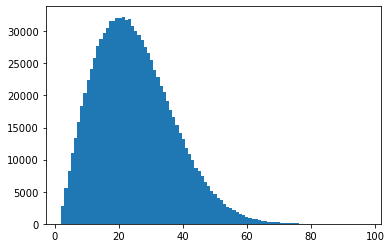

In [63]:
plt.hist(history, bins=96)